In [1]:
import pymysql.cursors
import os
from dotenv  import load_dotenv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import used_car

In [2]:
load_dotenv()

host = os.getenv('HOST')
user = os.getenv('USER')
password = os.getenv('PASSWORD')
database = os.getenv('DATABASE')

In [3]:
connection = pymysql.connect(user=user,
host = host,
password =password,
database =database)

In [4]:
cursor = connection.cursor()

In [5]:
query = '''select Type as car ,count(type) as Total from extension
group by type;'''


In [6]:

l = ['SUV','Van','Coupe','Sedan','Convertible','Pickup','Minivan','Hatchback','Wagon']

In [7]:
df = used_car.select_query(query)

In [8]:
df

,car,Total
0,SUV,9972
1,Van,286
2,Coupe,4163
3,Sedan,8124
4,Convertible,1310
5,Pickup,2959
6,Minivan,547
7,Hatchback,759
8,Wagon,6


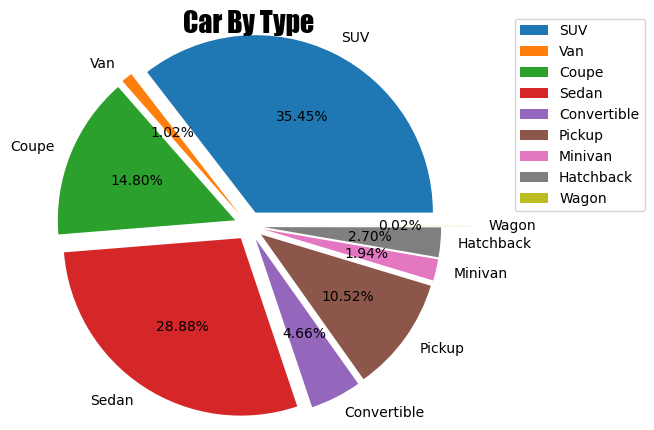

In [9]:
plt.pie(df['Total'],labels = l,autopct='%1.2f%%',explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.3),radius = 1.2)
plt.title('Car By Type',fontsize = 20,fontname='impact')
plt.legend(loc="center left",
          bbox_to_anchor=(1.2, 0.3, 1, 1))
plt.show()

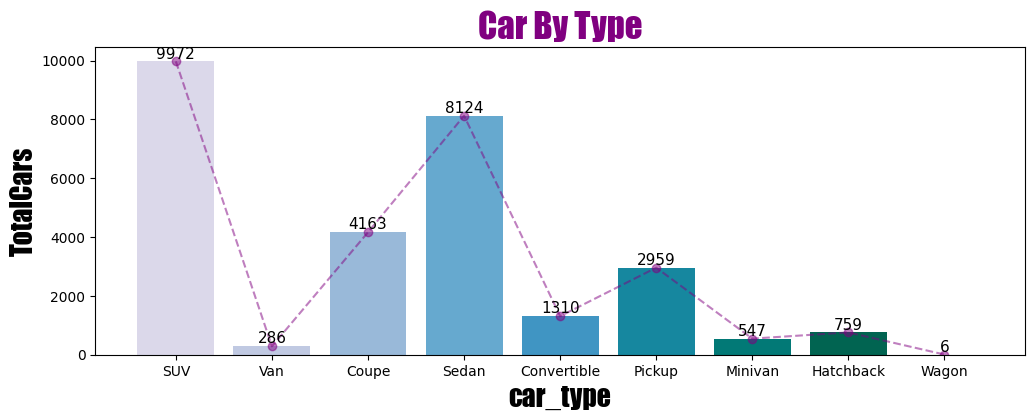

In [10]:
seq= np.linspace(0.2,1,9)
cm = plt.cm.PuBuGn(seq)
plt.figure(figsize=(12,4))
plt.bar(df['car'],df['Total'],color=cm)
plt.plot(df['Total'],marker = 'o',color='purple',alpha = 0.5,ls='dashed')

for i in range(len(df['car'])):
    plt.annotate(text = df['Total'][i],xy =( i,df['Total'][i]),horizontalalignment='center',verticalalignment='bottom',
                size=11)

plt.title('Car By Type',fontsize = 25,color = 'purple',fontname = 'impact')

plt.xlabel('car_type',size = 20,fontname = 'impact')
plt.ylabel('TotalCars',size=20,fontname = 'impact')
plt.show()

In [118]:
query = '''select type as car_type,avg(miles_per_gallon)  as Avg_mile_per_gallon from extension 
group by type;'''

In [119]:
df= used_car.select_query(query)

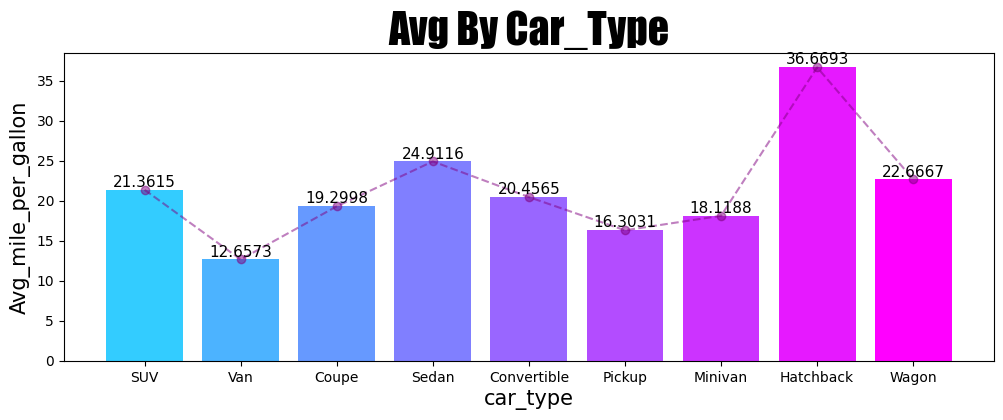

In [120]:
seq= np.linspace(0.2,1,9)
cm = plt.cm.cool(seq)
plt.figure(figsize=(12,4))
plt.bar(df['car_type'],df['Avg_mile_per_gallon'],color=cm)
plt.plot(df['Avg_mile_per_gallon'],marker = 'o',color='purple',alpha = 0.5,ls='dashed')
plt.title('Avg By Car_Type',fontsize=30,fontname='impact')

for i in range(len(df['car_type'])):
    plt.annotate(text = df['Avg_mile_per_gallon'][i],xy =( i,df['Avg_mile_per_gallon'][i]),horizontalalignment='center',verticalalignment='bottom',
                size=11)

plt.xlabel('car_type',size = 15)
plt.ylabel('Avg_mile_per_gallon',size=15)
plt.show()